In [1]:
import pandas as pd

In [2]:
credit_card=pd.read_csv('/content/creditcard.csv')

In [11]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
# Check for missing values
missing_values = credit_card.isnull().sum()
print(missing_values[missing_values > 0])

V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [15]:
# Assuming 'Class' column indicates fraud (1) and genuine (0)
num_genuine = credit_card[credit_card['Class'] == 0].shape[0]
num_fraud = credit_card[credit_card['Class'] == 1].shape[0]
total_transactions = credit_card.shape[0]
percentage_fraud = (num_fraud / total_transactions) * 100


In [16]:
print(f'Number of genuine transactions: {num_genuine}')
print(f'Number of fraud transactions: {num_fraud}')
print(f'Percentage of fraud transactions: {percentage_fraud:.2f}%')

Number of genuine transactions: 11615
Number of fraud transactions: 49
Percentage of fraud transactions: 0.42%


In [17]:
import matplotlib.pyplot as plt

In [18]:
# Visualization
labels = ['Genuine', 'Fraud']
sizes = [num_genuine, num_fraud]

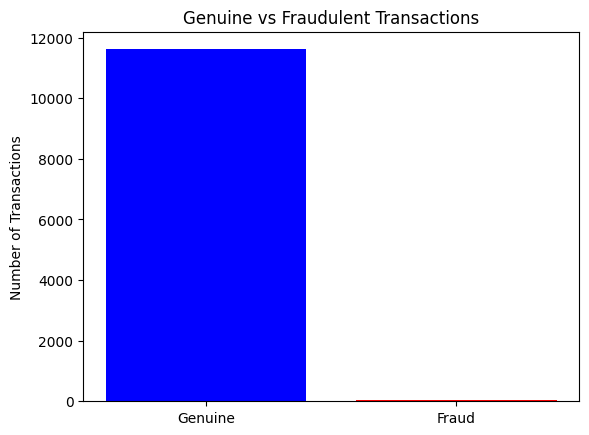

In [19]:
plt.bar(labels, sizes, color=['blue', 'red'])
plt.title('Genuine vs Fraudulent Transactions')
plt.ylabel('Number of Transactions')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler


In [22]:
# Normalize the 'Amount' column
scaler = StandardScaler()
credit_card['NormalizedAmount'] = scaler.fit_transform(credit_card[['Amount']])

In [23]:
from sklearn.model_selection import train_test_split


In [32]:
# Splitting the dataset
x = credit_card.drop(columns=['Class'])  # Features
y = credit_card['Class']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [33]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
dt_predictions = dt_model.predict(x_test)
rf_predictions = rf_model.predict(x_test)

In [45]:
x_test_clean = x_test.dropna()
y_test_clean = y_test.loc[x_test_clean.index]

In [47]:
dt_accuracy = dt_model.score(x_test_clean, y_test_clean)
rf_accuracy = rf_model.score(x_test_clean, y_test_clean)

In [48]:
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


In [49]:
from sklearn.metrics import classification_report, confusion_matrix


In [56]:
# Check for NaN values in y_test
print("NaN values in y_test:\n", y_test.isnull().sum())

# Remove any rows with NaN values in y_test
if y_test.isnull().any():
    # Find indices where y_test is NaN
    nan_indices = y_test[y_test.isnull()].index
    # Drop these indices from both X_test and y_test
    X_test_clean = X_test.drop(index=nan_indices)
    y_test_clean = y_test.drop(index=nan_indices)

# Now make predictions with the cleaned test set
dt_predictions = dt_model.predict(X_test_clean)
rf_predictions = rf_model.predict(X_test_clean)

# Compute performance metrics
dt_confusion = confusion_matrix(y_test_clean, dt_predictions)
dt_report = classification_report(y_test_clean, dt_predictions)



NaN values in y_test:
 1


In [57]:
rf_confusion = confusion_matrix(y_test_clean, rf_predictions)
rf_report = classification_report(y_test_clean, rf_predictions)

print("Decision Tree Confusion Matrix:\n", dt_confusion)
print("Decision Tree Classification Report:\n", dt_report)

print("Random Forest Confusion Matrix:\n", rf_confusion)
print("Random Forest Classification Report:\n", rf_report)


Decision Tree Confusion Matrix:
 [[3478    4]
 [   2   15]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3482
         1.0       0.79      0.88      0.83        17

    accuracy                           1.00      3499
   macro avg       0.89      0.94      0.92      3499
weighted avg       1.00      1.00      1.00      3499

Random Forest Confusion Matrix:
 [[3481    1]
 [   2   15]]
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3482
         1.0       0.94      0.88      0.91        17

    accuracy                           1.00      3499
   macro avg       0.97      0.94      0.95      3499
weighted avg       1.00      1.00      1.00      3499

